In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data from housing.csv file
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Total number of rows is 20640. All the columns other than total_bedrooms contain 20640 non-null values, it means there are some null values in that column.
#### As the number of null values is less comparatively, lets drop the rows with null values.

In [4]:
#Droppping the null values, keeping inplace true to make changes in original dataframe
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
#Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [7]:
#Creating x,y data for the model
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12014,-117.59,33.93,17.0,338.0,47.0,200.0,46.0,7.8118,INLAND,244200.0
9433,-122.80,38.18,36.0,2378.0,476.0,957.0,362.0,3.6250,NEAR OCEAN,253100.0
17003,-122.29,37.55,27.0,3789.0,874.0,2243.0,866.0,4.3900,NEAR OCEAN,270100.0
13422,-117.46,34.04,3.0,12870.0,2315.0,5820.0,1759.0,4.2429,INLAND,147300.0
9742,-121.60,36.81,18.0,1575.0,230.0,751.0,219.0,5.2203,<1H OCEAN,286500.0
...,...,...,...,...,...,...,...,...,...,...
11143,-117.94,33.84,25.0,4016.0,831.0,2166.0,774.0,3.1884,<1H OCEAN,135400.0
19934,-119.34,36.31,14.0,1635.0,422.0,870.0,399.0,2.7000,INLAND,88900.0
13771,-117.03,34.02,26.0,3909.0,670.0,1884.0,665.0,4.1361,INLAND,121000.0
273,-122.20,37.78,45.0,1766.0,332.0,869.0,327.0,4.5893,NEAR BAY,163500.0


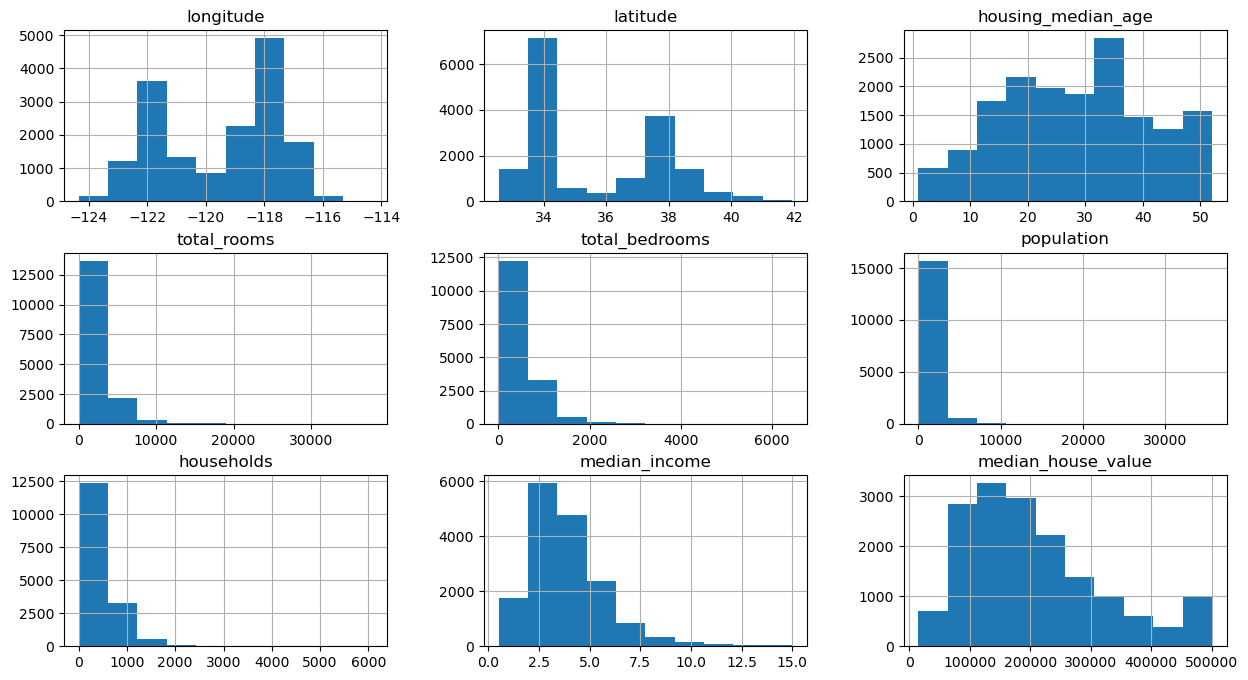

In [13]:
train_data.hist(figsize=(15,8))
plt.show()

In [14]:
train_data.drop(['ocean_proximity'], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924072,-0.110068,0.047021,0.074893,0.103417,0.061472,-0.021746,-0.051038
latitude,-0.924072,1.000000,0.013009,-0.038655,-0.072345,-0.112254,-0.076903,-0.073522,-0.139903
housing_median_age,-0.110068,0.013009,1.000000,-0.361382,-0.321387,-0.291682,-0.302319,-0.117720,0.102734
total_rooms,0.047021,-0.038655,-0.361382,1.000000,0.929569,0.853331,0.919175,0.196693,0.134043
total_bedrooms,0.074893,-0.072345,-0.321387,0.929569,1.000000,0.873798,0.979913,-0.011038,0.047053
population,0.103417,-0.112254,-0.291682,0.853331,0.873798,1.000000,0.902853,0.001355,-0.025493
households,0.061472,-0.076903,-0.302319,0.919175,0.979913,0.902853,1.000000,0.010111,0.062603
median_income,-0.021746,-0.073522,-0.117720,0.196693,-0.011038,0.001355,0.010111,1.000000,0.688803
median_house_value,-0.051038,-0.139903,0.102734,0.134043,0.047053,-0.025493,0.062603,0.688803,1.000000


<Axes: >

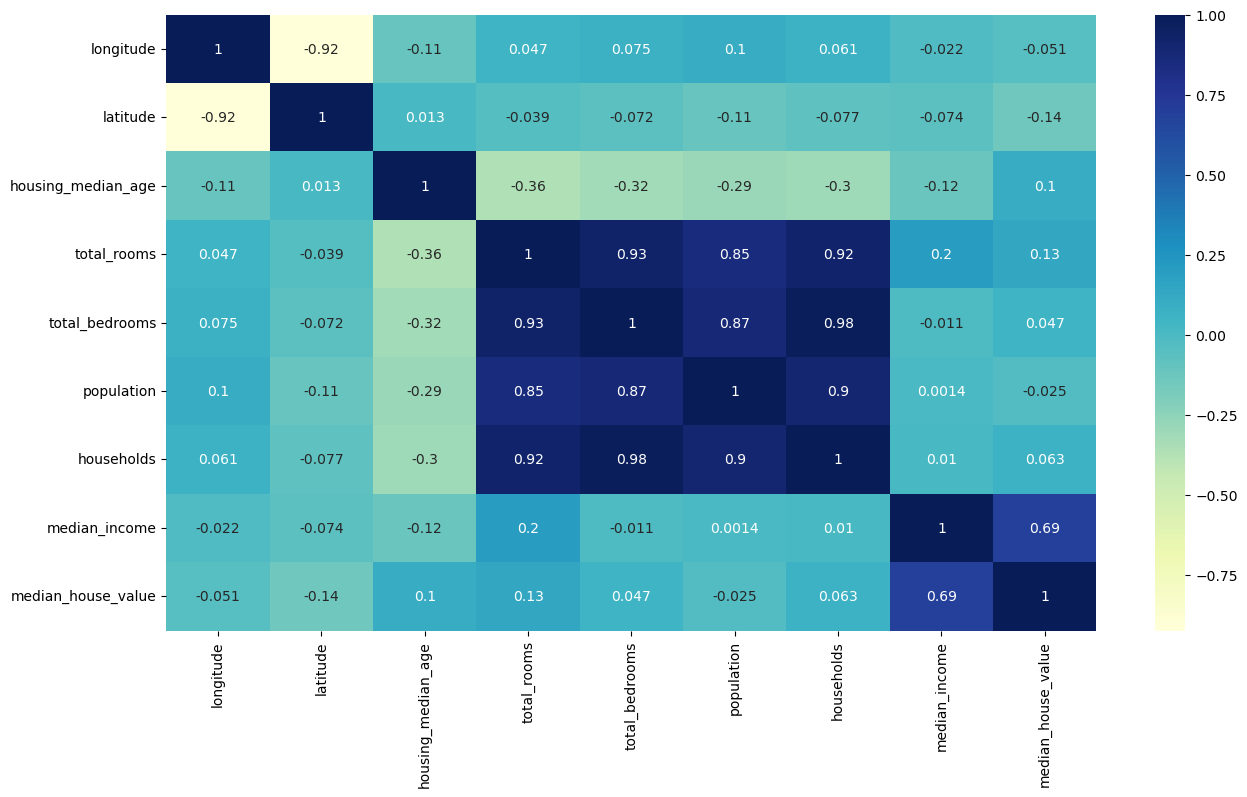

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] * 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] * 1)
train_data['population'] = np.log(train_data['population'] * 1)
train_data['households'] = np.log(train_data['households'] * 1)

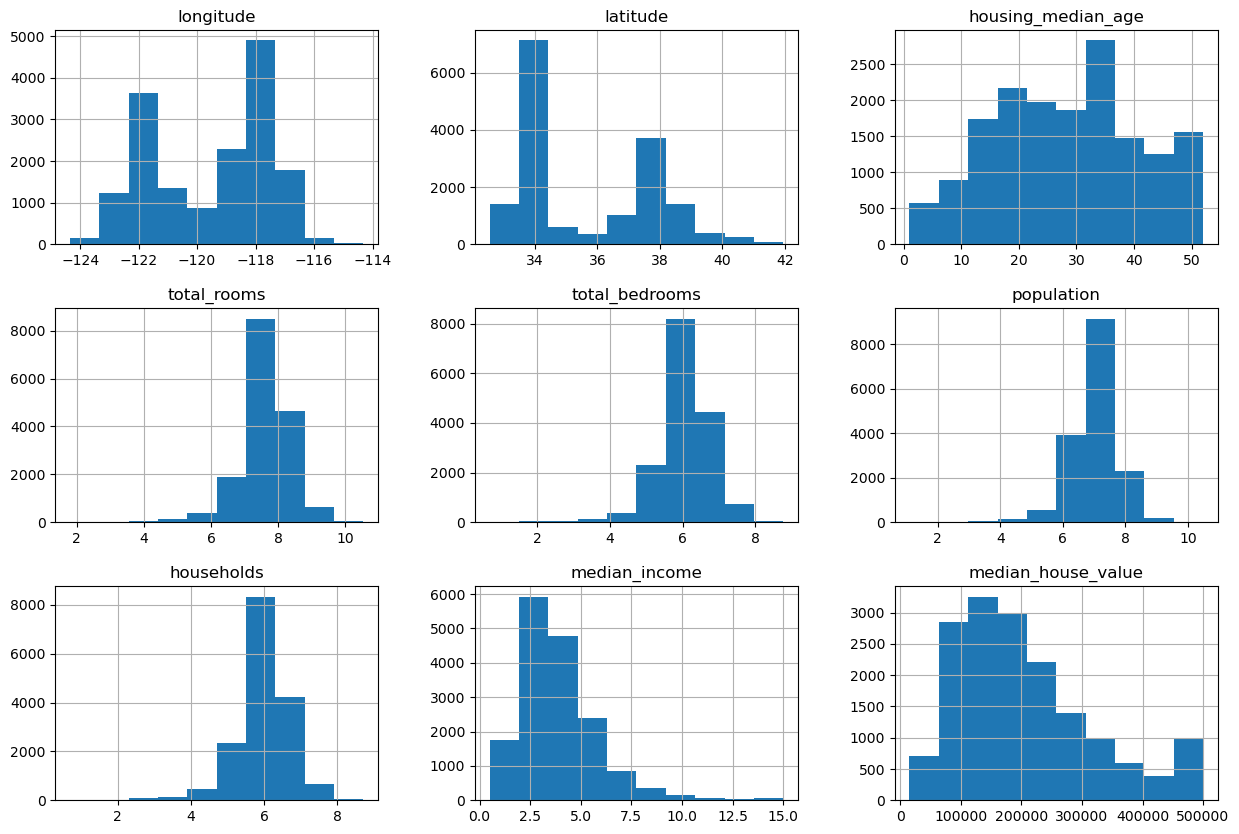

In [17]:

train_data.hist(figsize=(15,10))
plt.show()

#### Done with data exploring. Now, lets start data preprocessing.

In [18]:
#Using pandas one hot encoding
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12014,0,1,0,0,0
9433,0,0,0,0,1
17003,0,0,0,0,1
13422,0,1,0,0,0
9742,1,0,0,0,0
...,...,...,...,...,...
11143,1,0,0,0,0
19934,0,1,0,0,0
13771,0,1,0,0,0
273,0,0,0,1,0


In [19]:
#Joining the dummies with training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12014,-117.59,33.93,17.0,5.823046,3.850148,5.298317,3.828641,7.8118,244200.0,0,1,0,0,0
9433,-122.80,38.18,36.0,7.774015,6.165418,6.863803,5.891644,3.6250,253100.0,0,0,0,0,1
17003,-122.29,37.55,27.0,8.239857,6.773080,7.715570,6.763885,4.3900,270100.0,0,0,0,0,1
13422,-117.46,34.04,3.0,9.462654,7.747165,8.669056,7.472501,4.2429,147300.0,0,1,0,0,0
9742,-121.60,36.81,18.0,7.362011,5.438079,6.621406,5.389072,5.2203,286500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,-117.94,33.84,25.0,8.298042,6.722630,7.680637,6.651572,3.1884,135400.0,1,0,0,0,0
19934,-119.34,36.31,14.0,7.399398,6.045005,6.768493,5.988961,2.7000,88900.0,0,1,0,0,0
13771,-117.03,34.02,26.0,8.271037,6.507278,7.541152,6.499787,4.1361,121000.0,0,1,0,0,0
273,-122.20,37.78,45.0,7.476472,5.805135,6.767343,5.789960,4.5893,163500.0,0,0,0,1,0


<Axes: >

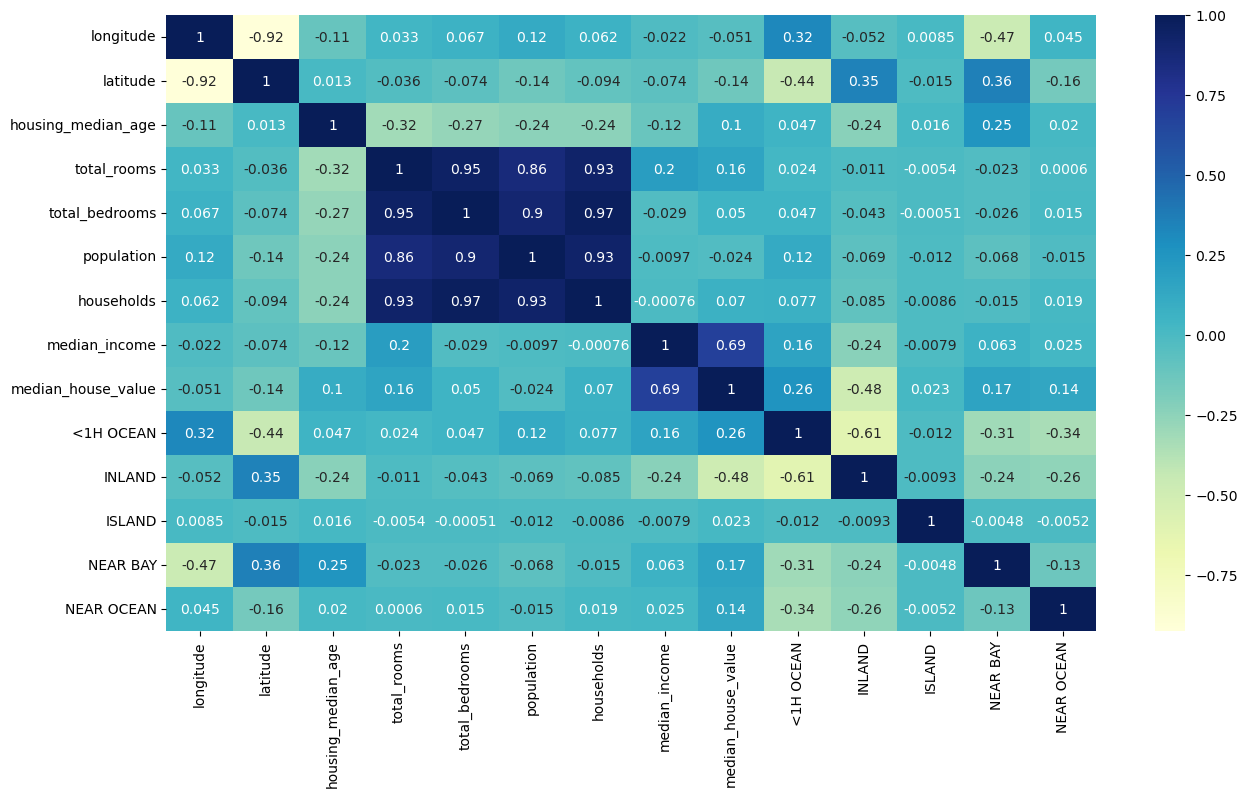

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

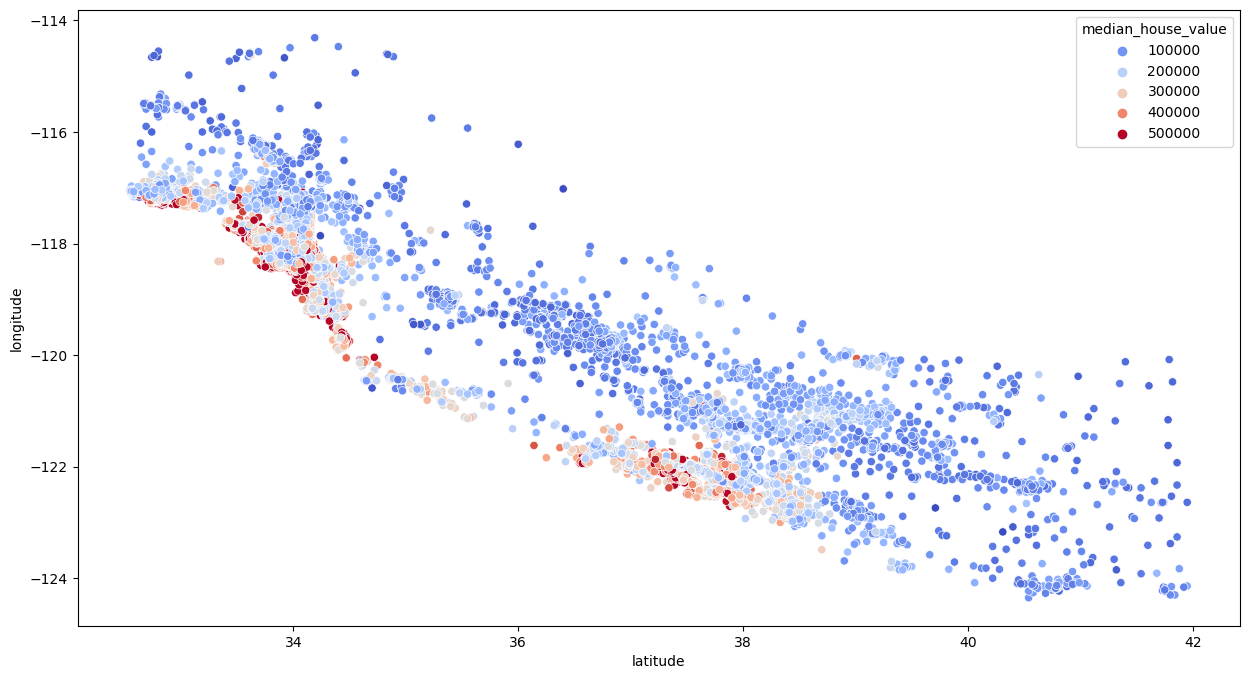

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

#### Here, we can see the houses near the coastline have higher median house value as compared to the ones in inland area.

#### Started with feature engineering

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12014,-117.59,33.93,17.0,5.823046,3.850148,5.298317,3.828641,7.8118,244200.0,0,1,0,0,0,0.661191,1.520917
9433,-122.80,38.18,36.0,7.774015,6.165418,6.863803,5.891644,3.6250,253100.0,0,0,0,0,1,0.793080,1.319498
17003,-122.29,37.55,27.0,8.239857,6.773080,7.715570,6.763885,4.3900,270100.0,0,0,0,0,1,0.821990,1.218214
13422,-117.46,34.04,3.0,9.462654,7.747165,8.669056,7.472501,4.2429,147300.0,0,1,0,0,0,0.818709,1.266330
9742,-121.60,36.81,18.0,7.362011,5.438079,6.621406,5.389072,5.2203,286500.0,1,0,0,0,0,0.738668,1.366100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,-117.94,33.84,25.0,8.298042,6.722630,7.680637,6.651572,3.1884,135400.0,1,0,0,0,0,0.810147,1.247531
19934,-119.34,36.31,14.0,7.399398,6.045005,6.768493,5.988961,2.7000,88900.0,0,1,0,0,0,0.816959,1.235506
13771,-117.03,34.02,26.0,8.271037,6.507278,7.541152,6.499787,4.1361,121000.0,0,1,0,0,0,0.786755,1.272509
273,-122.20,37.78,45.0,7.476472,5.805135,6.767343,5.789960,4.5893,163500.0,0,0,0,1,0,0.776454,1.291282


<Axes: >

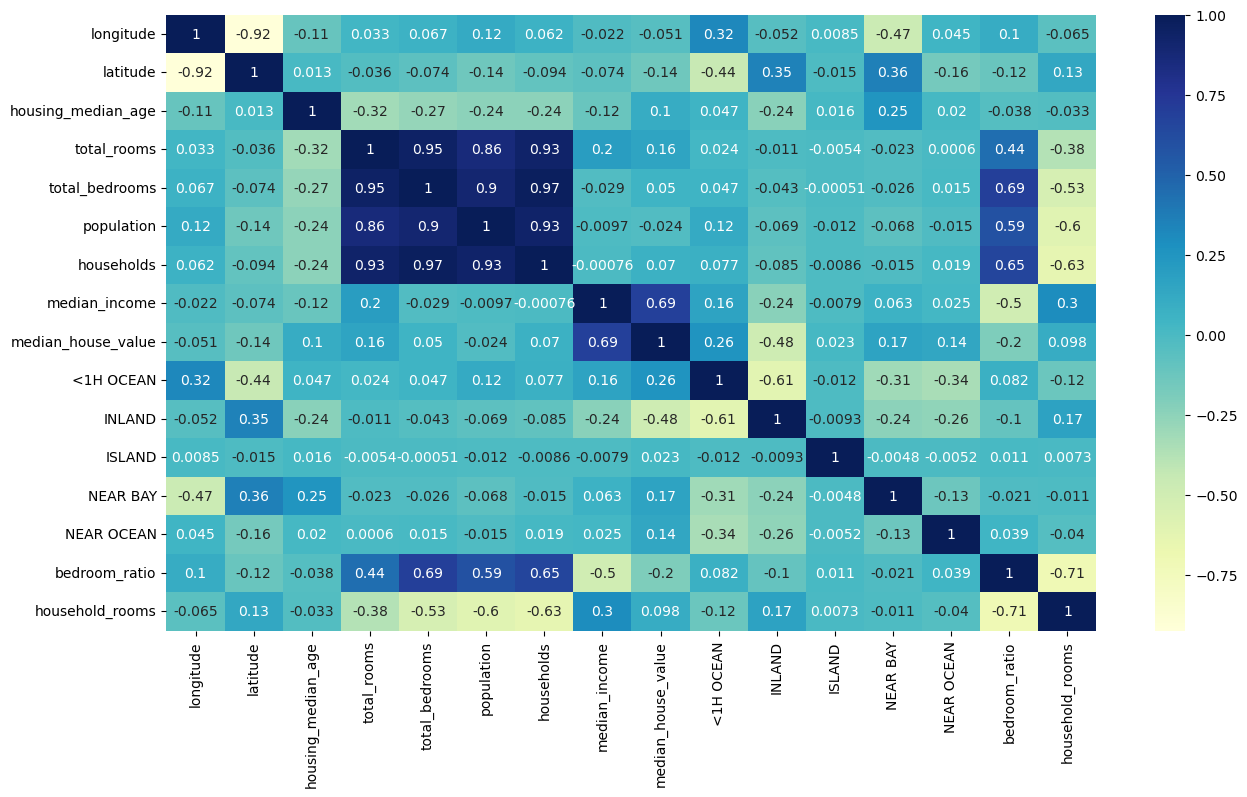

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

#### We are done with feature engineering. lets, train some models on the data. Firstly we will start with simple linear regression.

In [26]:
#Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [27]:
X_train, Y_train = train_data. drop (['median_house_value'], axis= 1), train_data['median_house_value']

X_train_s= scaler.fit_transform(X_train)



reg= LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

In [28]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] * 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] * 1)
test_data['population'] = np.log(test_data['population'] * 1)
test_data['households'] = np.log(test_data['households'] * 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [29]:
test_data.shape

(4087, 16)

In [35]:
# np.isinf(test_data).any().any()

infinite_rows = test_data[np.isinf(test_data).any(axis=1)]
print(infinite_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16171     -122.5     37.79                52.0     2.079442             0.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
16171    2.564949         0.0        15.0001            500001.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
16171       0       0         1           0            0.0              inf  


In [36]:
test_data= test_data[np.isfinite(test_data).all(1)]


In [37]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [38]:
X_test_s = scaler.transform(X_test)

In [39]:
reg.score(X_test_s, y_test)

0.6844548171262491

#### RandomForestRegression

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [43]:
forest.score(X_test_s, y_test)

0.8165728020162888

In [45]:
from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()




In [ ]:
param_grid = {

    'n_estimators': [100, 200,300 ],
    'min_samples_split': [2,4],
    'max_depth': [None, 4, 8]
    
    
}

In [49]:
grid_search= GridSearchCV(forest, param_grid, cv=5, scoring= 'neg_mean_squared_error', return_train_score = True)




In [ ]:
grid_search.fit(X_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_


In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)
